<a href="https://colab.research.google.com/github/YonggunJung/AI2_Ploy/blob/main/16_1%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B3%B8%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
# MNIST데이터 불러오기
from tensorflow.keras.datasets import mnist
# 학습셋과 테스트셋 분리 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print("학습셋 이미지 수 : %d개" % (x_train.shape[0]))
print("테스트셋 이미지 수 : %d개" % (x_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


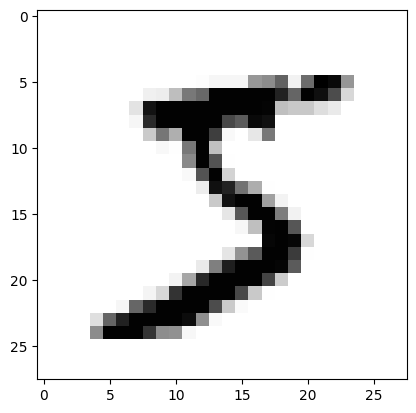

In [4]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [5]:
for x in x_train[0]:
    for i in x:
        sys.stdout.write("%-3s" %i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
# 2차원 배열을 784개의 1차원으로 변환
# reshape(총 샘플 수, 1차원 속성의 갯수)
x_train = x_train.reshape(x_train.shape[0], 784)

In [7]:
# 정규화를 위해 실수형으로 바꾸고 나누기 255
x_train = x_train.astype('float64')
x_test = x_test / 255

In [8]:
x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255

In [9]:
# 잘 불러 오는지 확인
print("class : %d" %(y_train[0]))

class : 5


In [11]:
from tensorflow.keras.utils import to_categorical
# 원핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 생성
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 모델 성과 저장 및 최적화 단계에서 자동 중단
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
# 모델 실행
history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.81144, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.81144 to 0.70851, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss did not improve from 0.70851

Epoch 4: val_loss improved from 0.70851 to 0.70624, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.70624 to 0.66127, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.66127

Epoch 7: val_loss did not improve from 0.66127

Epoch 8: val_loss did not improve from 0.66127

Epoch 9: val_loss improved from 0.66127 to 0.64780, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.64780

Epoch 11: val_loss did not improve from 0.64780

Epoch 12: val_loss did not improve from 0.64780

Epoch 13: val_loss did not improve from 0.64780

Epoch 14: val_loss did not improve from 0.64780

Epoch 15: val_loss did not improve from 0.64780

Epoch 16: val_loss did not improve from 0.64780

Epoch 17: val_loss did not improve fro

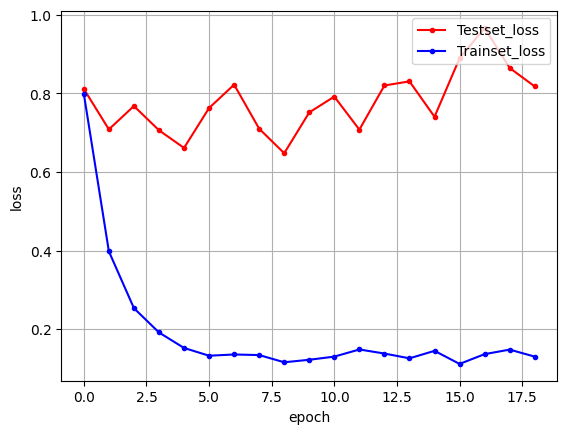

In [17]:
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()